In [3]:
import json

filename = 'data_meas_recycle.json'

with open(filename, 'r') as json_file:
    data = json.load(json_file)

data

{'molecule': 'H2',
 'adapt_iter': 2,
 'total_iter': 11,
 'standard_h': 15,
 'grouped_h': 5,
 'res': {'pool_name': 'GSD',
  'standard_g': 60,
  'grouped_g': 21,
  'reused_g': 16}}

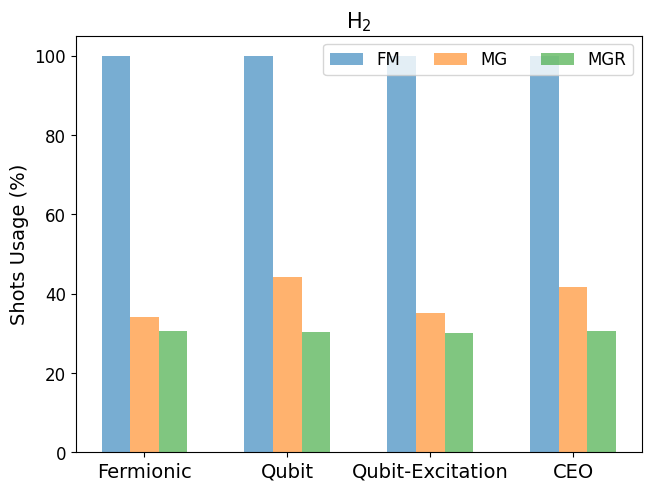

In [41]:
import matplotlib.pyplot as plt
import numpy as np

pools = ("Fermionic", "Qubit", "Qubit-Excitation", "CEO")
methods = {
    'FM': (100, 100, 100, 100),
    'MG': (34.03, 44.28, 35.02, 41.75),
    'MGR': (30.52, 30.21, 29.96, 30.52),
}

x = np.arange(len(species))  # the label locations
width = 0.2  # the width of the bars
multiplier = -0.5

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in methods.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, alpha=0.6)
    # ax.bar_label(rects, padding=4, fontsize=10, labels=[f'{val:.1f}%' for val in measurement])
    multiplier += 1

# Labels and ticks
ax.set_ylabel('Shots Usage (%)', fontsize=14)
ax.set_xticks(x + width / 2, pools, fontsize=14)
# ax.legend(loc='upper right', ncols=1, fontsize=12)
ax.legend(loc='upper right', ncols=3, fontsize=12)

# ax.set_ylim(0, 50)
# ax.set_yticks([0, 20, 40])
ax.tick_params(axis='y', labelsize=12)
plt.title('H$_2$', fontsize=15)
plt.show()

# Save and show plot
# plt.savefig('Measurement_recycling.pdf', format='pdf', dpi=300, bbox_inches='tight')


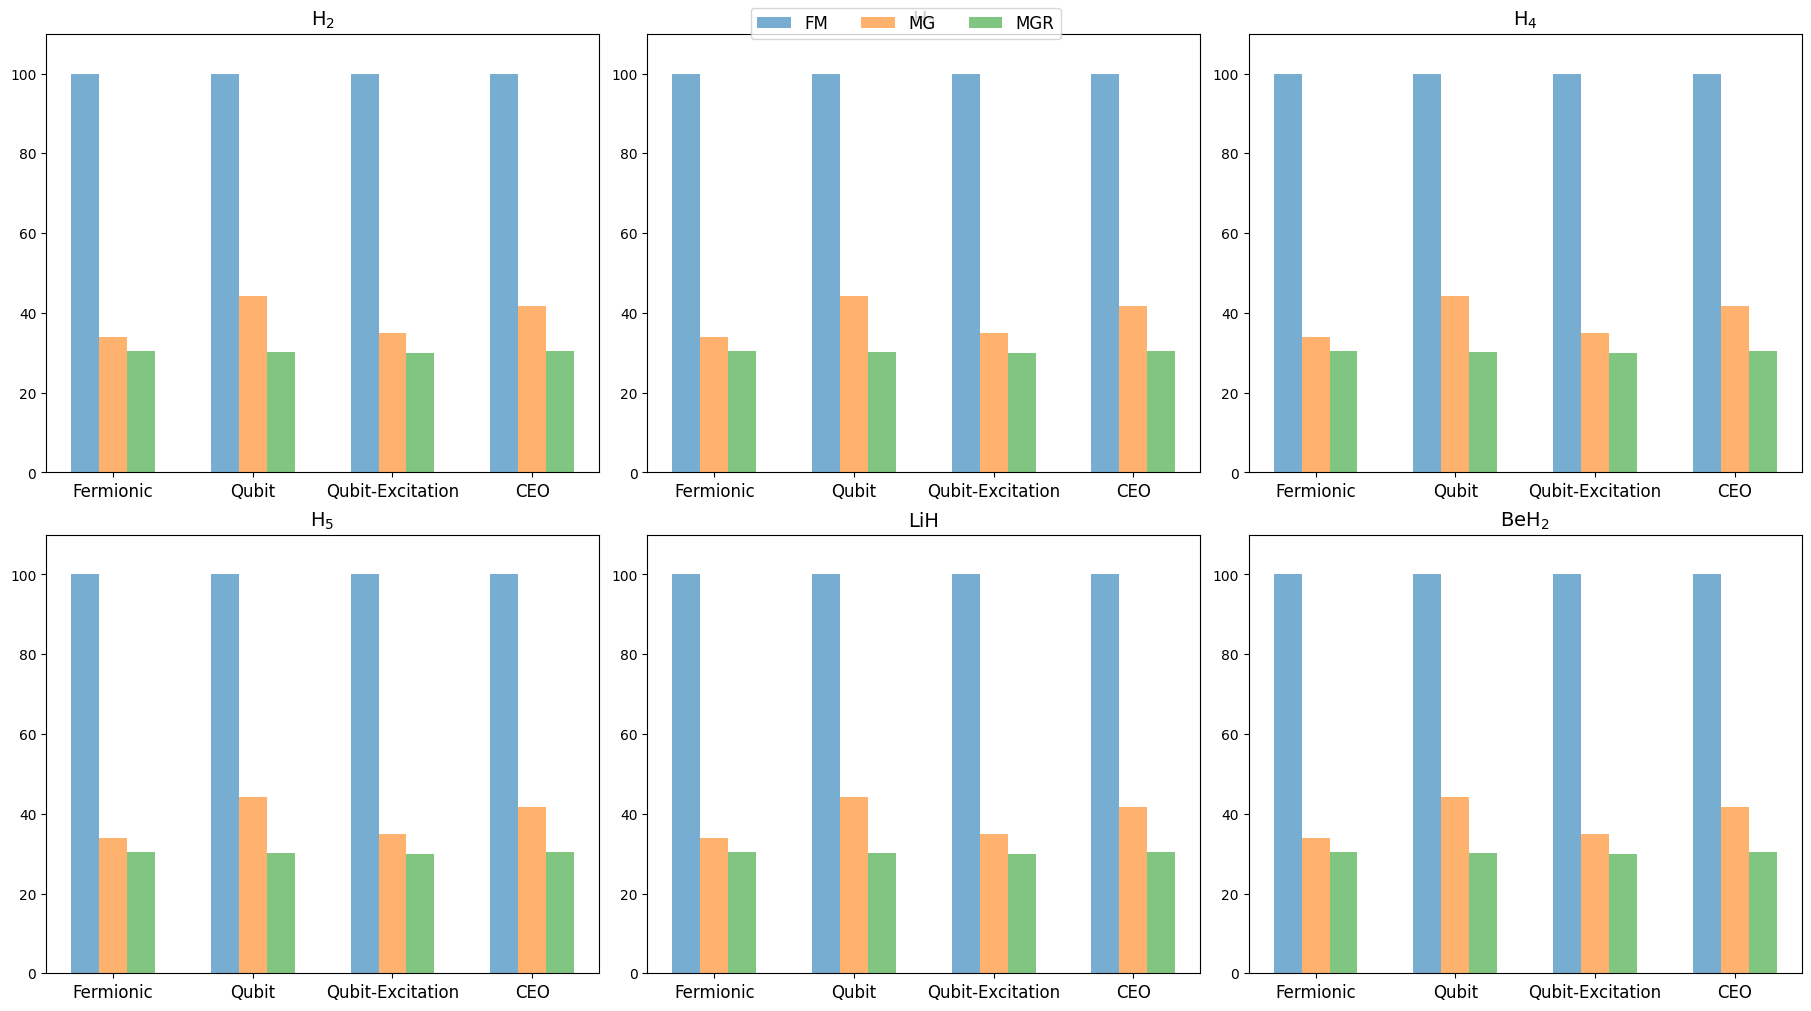

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Data
pools_h2 = ("Fermionic", "Qubit", "Qubit-Excitation", "CEO")
methods_h2 = {
    'FM': (100, 100, 100, 100),
    'MG': (34.03, 44.28, 35.02, 41.75),
    'MGR': (30.52, 30.21, 29.96, 30.52),
}

# Molecule variations
molecules = ["H$_2$", "H$_3$", "H$_4$", "H$_5$", "LiH", "BeH$_2$"]

# Creating 3x2 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10), layout='constrained')
width = 0.2  # Width of the bars

for ax, molecule in zip(axes.flat, molecules):
    x = np.arange(len(pools_h2))  # Label locations
    multiplier = -0.5
    
    for attribute, measurement in methods_h2.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, alpha=0.6)
        multiplier += 1
    
    # Labels and ticks
    ax.set_title(molecule, fontsize=14)
    # ax.set_ylabel('Shots Usage (%)', fontsize=12)
    ax.set_xticks(x + width / 2, pools_h2, fontsize=12)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_ylim(0, 110)
    
# Add a single legend outside the plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, fontsize=12)

# Show the plot

plt.savefig('Full_Measurement_recycling.pdf', format='pdf', dpi=300, bbox_inches='tight')
# plt.savefig('Full_Measurement_recycling.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()


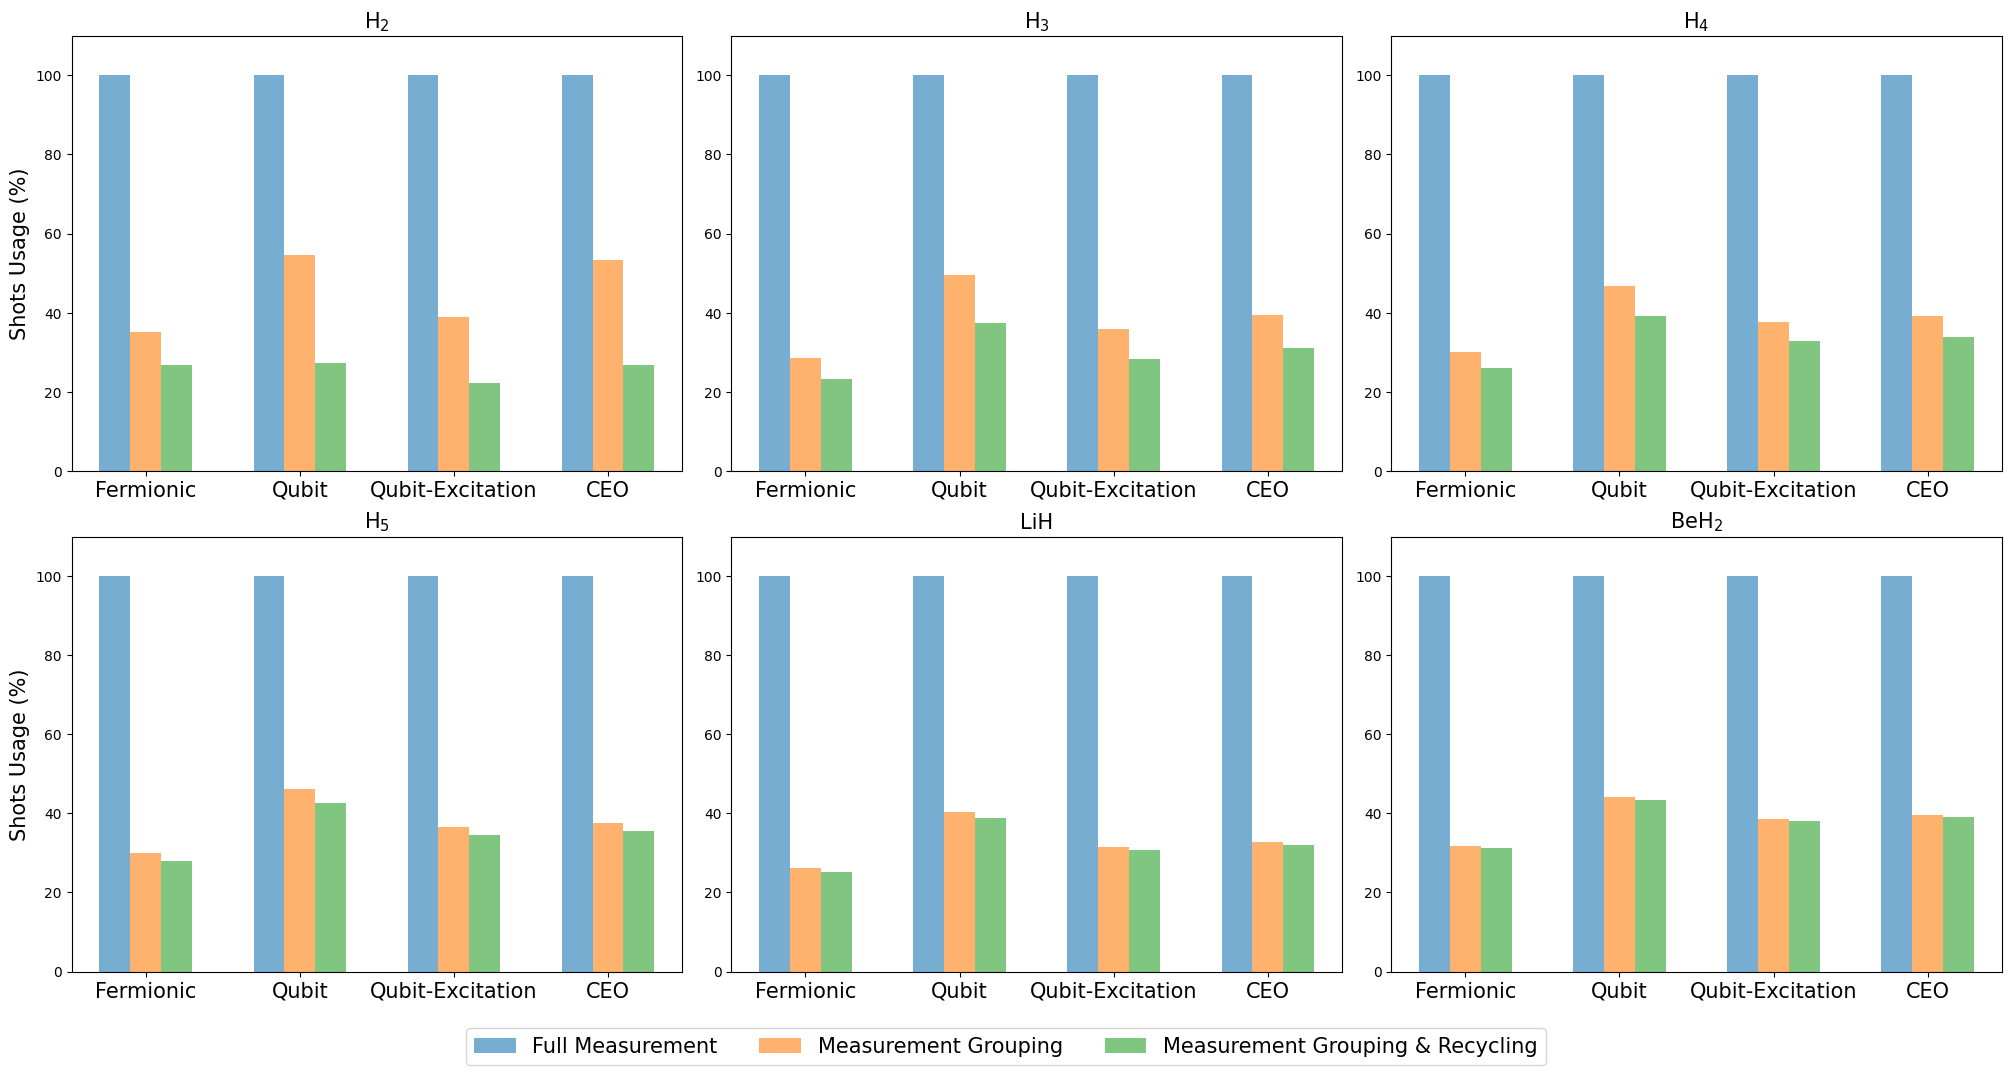

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Molecule variations
molecules = ["H$_2$", "H$_3$", "H$_4$", "H$_5$", "LiH", "BeH$_2$"]

# Data for each molecule
pools_data = {
    "H$_2$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "H$_3$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "H$_4$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "H$_5$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "LiH": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "BeH$_2$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
}

methods_data = {
    "H$_2$": {
        'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (35, 54.54, 38.89, 53.33),
        'Measurement Grouping & Recycling': (26.67, 27.27, 22.22, 26.67),
    },
    "H$_3$": {
        'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (28.39, 49.41, 35.97, 39.31),
        'Measurement Grouping & Recycling': (23.21, 37.31, 28.22, 30.98),
    },
    "H$_4$": {
        'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (29.92, 46.64, 37.70, 39.16),
        'Measurement Grouping & Recycling': (25.98, 39.18, 32.75, 33.9),
    },
    "H$_5$": {
        'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (30.06, 46.27, 36.44, 37.63),
        'Measurement Grouping & Recycling': (28.01, 42.69, 34.51, 35.52),
    },
    "LiH": {
        'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (26.25, 40.31, 31.41, 32.76),
        'Measurement Grouping & Recycling': (25.27, 38.93, 30.74, 32.05),
    },
    "BeH$_2$": {
        'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (31.75, 44.26, 38.59, 39.51),
        'Measurement Grouping & Recycling': (31.13, 43.44, 38.16, 39.05),
    },
}

# Creating 3x2 grid
fig, axes = plt.subplots(2, 3, figsize=(20, 10), layout='constrained')
width = 0.2  # Width of the bars

for i, (ax, molecule) in enumerate(zip(axes.flat, molecules)):
    pools = pools_data[molecule]
    methods = methods_data[molecule]
    x = np.arange(len(pools))  # Label locations
    multiplier = -0.5
    
    for attribute, measurement in methods.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, alpha=0.6)
        multiplier += 1
    
    # Labels and ticks
    ax.set_title(molecule, fontsize=15)
    if i % 3 == 0:
        ax.set_ylabel('Shots Usage (%)', fontsize=15)
    ax.set_xticks(x + width / 2, pools, fontsize=15)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_ylim(0, 110)
    
# Add a single legend outside the plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=15, bbox_to_anchor=(0.5, -0.07))

plt.savefig('Full_Measurement_recycling.pdf', format='pdf', dpi=300, bbox_inches='tight')
# plt.savefig('Full_Measurement_recycling.eps', format='eps', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


NameError: name 'r' is not defined

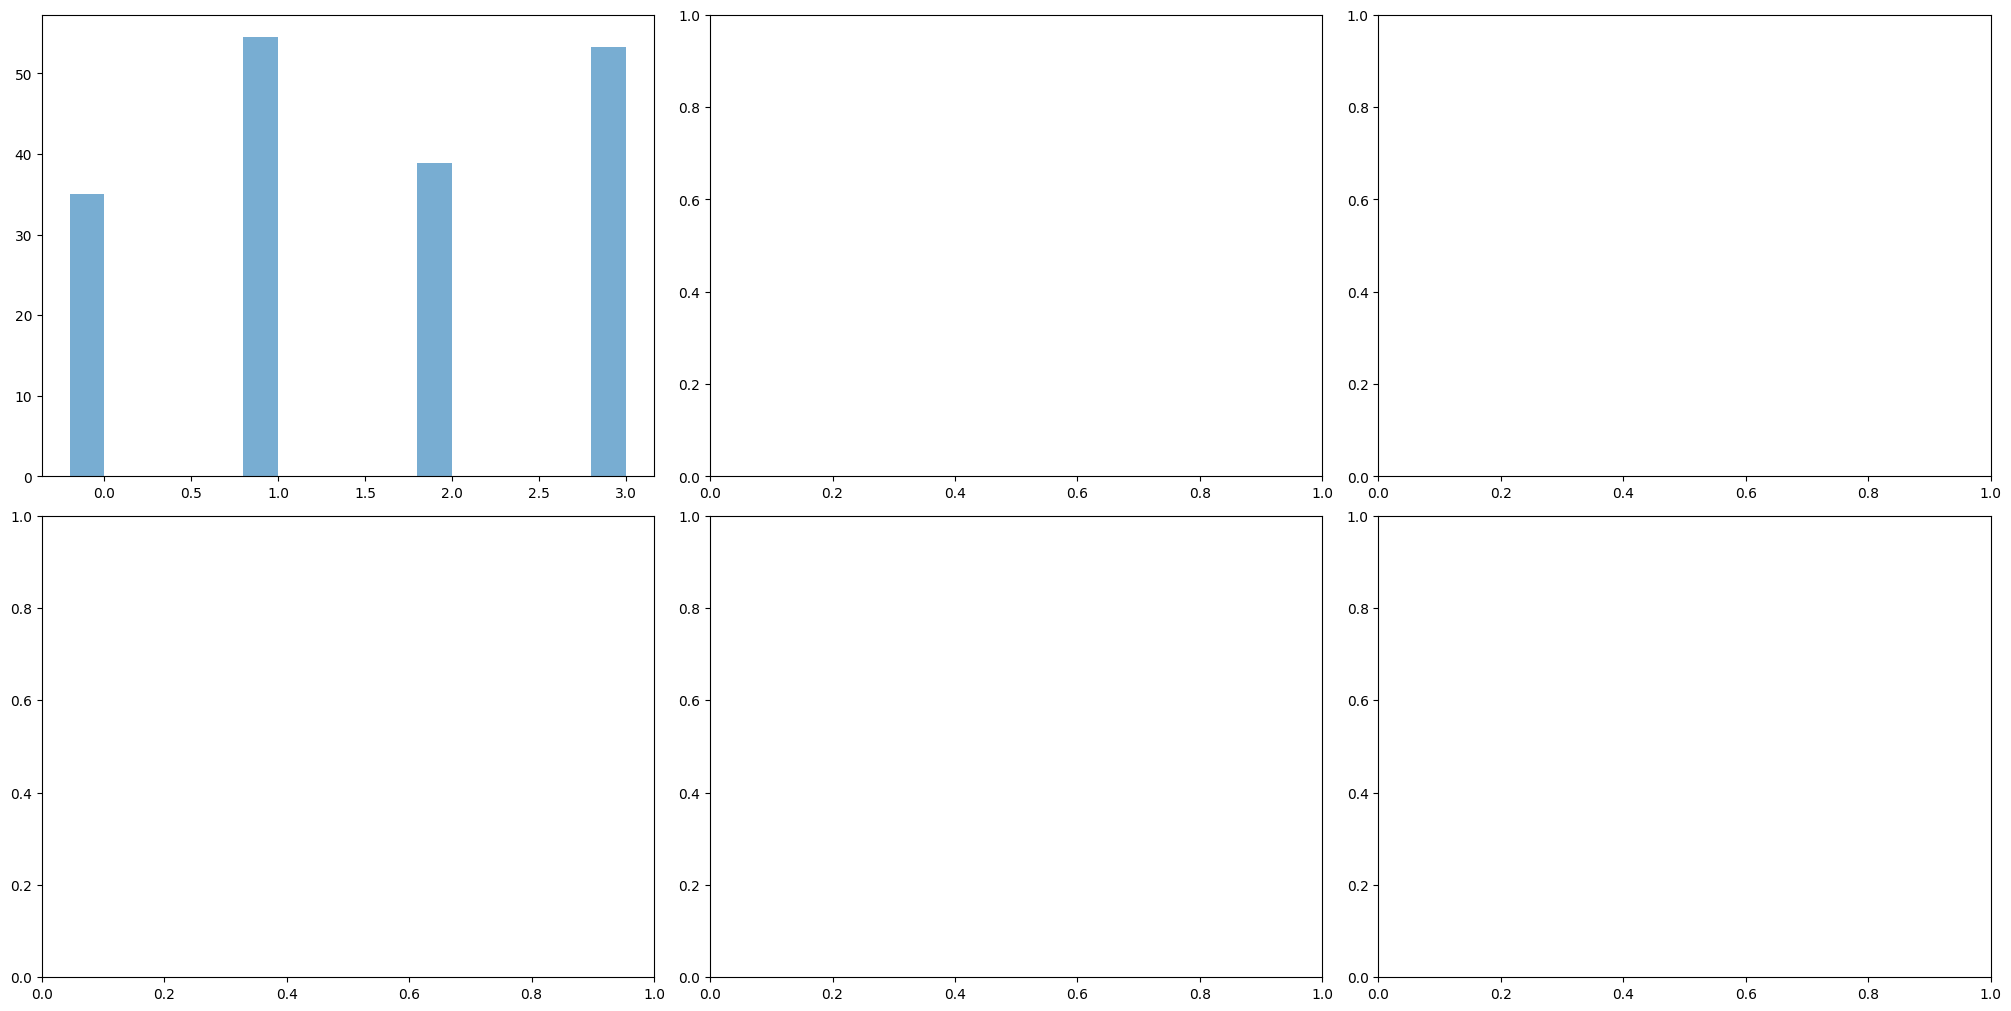

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Molecule variations
molecules = ["H$_2$", "H$_3$", "H$_4$", "H$_5$", "LiH", "BeH$_2$"]

# Data for each molecule
pools_data = {
    "H$_2$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "H$_3$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "H$_4$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "H$_5$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "LiH": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "BeH$_2$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
}

methods_data = {
    "H$_2$": {
        # 'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (35, 54.54, 38.89, 53.33),
        'Measurement Grouping & Recycling': (26.67, 27.27, 22.22, 26.67),
    },
    "H$_3$": {
        # 'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (28.39, 49.41, 35.97, 39.31),
        'Measurement Grouping & Recycling': (23.21, 37.31, 28.22, 30.98),
    },
    "H$_4$": {
        # 'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (29.92, 46.64, 37.70, 39.16),
        'Measurement Grouping & Recycling': (25.98, 39.18, 32.75, 33.9),
    },
    "H$_5$": {
        # 'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (30.06, 46.27, 36.44, 37.63),
        'Measurement Grouping & Recycling': (28.01, 42.69, 34.51, 35.52),
    },
    "LiH": {
        # 'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (26.25, 40.31, 31.41, 32.76),
        'Measurement Grouping & Recycling': (25.27, 38.93, 30.74, 32.05),
    },
    "BeH$_2$": {
        # 'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (31.75, 44.26, 38.59, 39.51),
        'Measurement Grouping & Recycling': (31.13, 43.44, 38.16, 39.05),
    },
}

# Creating 3x2 grid
fig, axes = plt.subplots(2, 3, figsize=(20, 10), layout='constrained')
width = 0.2  # Width of the bars

for i, (ax, molecule) in enumerate(zip(axes.flat, molecules)):
    pools = pools_data[molecule]
    methods = methods_data[molecule]
    x = np.arange(len(pools))  # Label locations
    multiplier = -0.5
    
    for attribute, measurement in methods.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, alpha=0.6)
        multiplier = -0.5
        
        r += 1
    
    # Labels and ticks
    ax.set_title(molecule, fontsize=15)
    if i % 3 == 0:
        ax.set_ylabel('Shots Usage (%)', fontsize=15)
    ax.set_xticks(x + width / 2, pools, fontsize=15)
    ax.tick_params(axis='y', labelsize=10)
    # ax.set_ylim(0, 110)
    
# Add a single legend outside the plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=15, bbox_to_anchor=(0.5, -0.07))

plt.savefig('Full_Measurement_recycling_2.pdf', format='pdf', dpi=300, bbox_inches='tight')
# plt.savefig('Full_Measurement_recycling.eps', format='eps', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


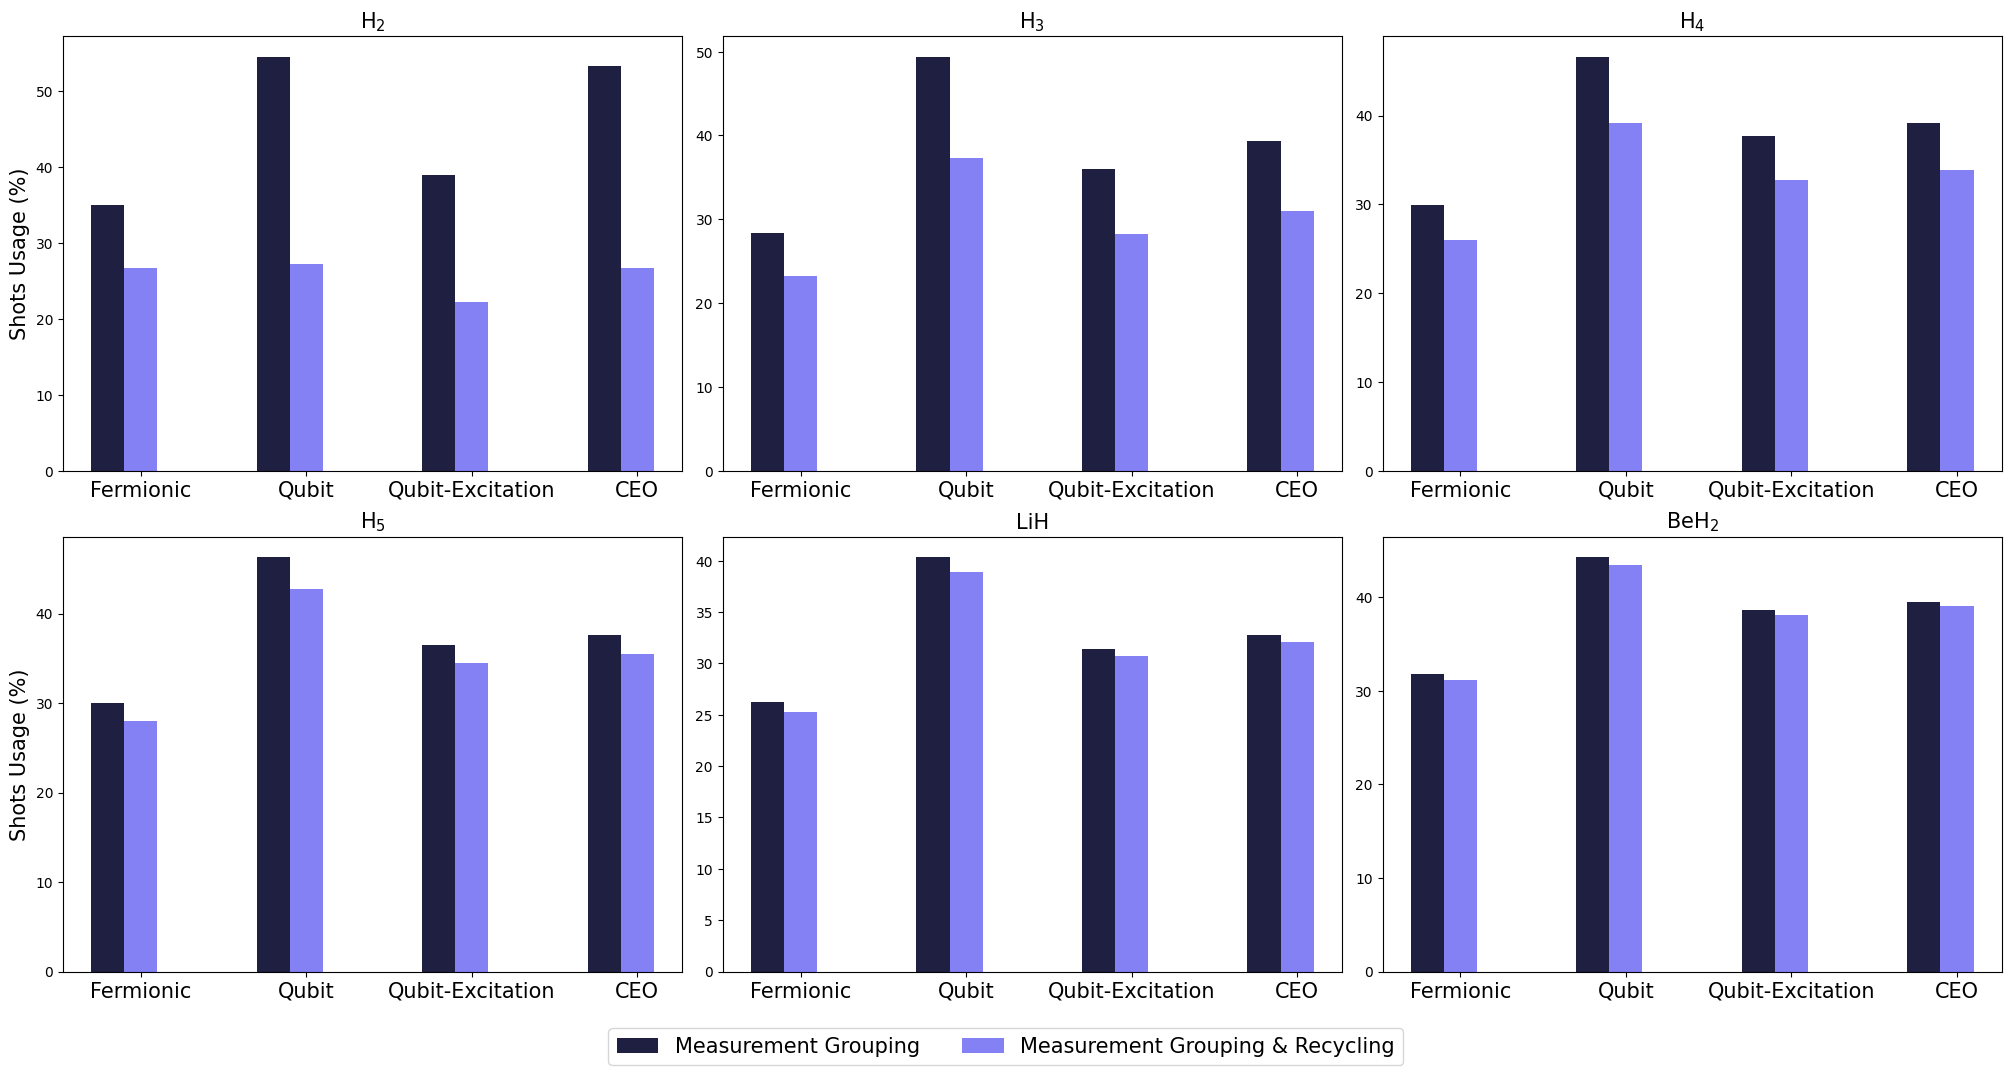

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Molecule variations
molecules = ["H$_2$", "H$_3$", "H$_4$", "H$_5$", "LiH", "BeH$_2$"]

# Data for each molecule
pools_data = {
    "H$_2$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "H$_3$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "H$_4$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "H$_5$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "LiH": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "BeH$_2$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
}

methods_data = {
    "H$_2$": {
        # 'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (35, 54.54, 38.89, 53.33),
        'Measurement Grouping & Recycling': (26.67, 27.27, 22.22, 26.67),
    },
    "H$_3$": {
        # 'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (28.39, 49.41, 35.97, 39.31),
        'Measurement Grouping & Recycling': (23.21, 37.31, 28.22, 30.98),
    },
    "H$_4$": {
        # 'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (29.92, 46.64, 37.70, 39.16),
        'Measurement Grouping & Recycling': (25.98, 39.18, 32.75, 33.9),
    },
    "H$_5$": {
        # 'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (30.06, 46.27, 36.44, 37.63),
        'Measurement Grouping & Recycling': (28.01, 42.69, 34.51, 35.52),
    },
    "LiH": {
        # 'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (26.25, 40.31, 31.41, 32.76),
        'Measurement Grouping & Recycling': (25.27, 38.93, 30.74, 32.05),
    },
    "BeH$_2$": {
        # 'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (31.75, 44.26, 38.59, 39.51),
        'Measurement Grouping & Recycling': (31.13, 43.44, 38.16, 39.05),
    },
}

# colors = ['#1F2041', '#55505C']
colors = ['#8481F5', '#1F2041']
colors = ['#1F2041', '#8481F5']

# Creating 3x2 grid
fig, axes = plt.subplots(2, 3, figsize=(20, 10), layout='constrained')
width = 0.2  # Width of the bars

for i, (ax, molecule) in enumerate(zip(axes.flat, molecules)):
    pools = pools_data[molecule]
    methods = methods_data[molecule]
    x = np.arange(len(pools))  # Label locations
    multiplier = -0.5
    
    for j, (attribute, measurement) in enumerate(methods.items()):
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, alpha=1, color=colors[j])
        multiplier += 1
    
    # Labels and ticks
    ax.set_title(molecule, fontsize=15)
    if i % 3 == 0:
        ax.set_ylabel('Shots Usage (%)', fontsize=15)
    ax.set_xticks(x + width / 2, pools, fontsize=15)
    ax.tick_params(axis='y', labelsize=10)
    # ax.set_ylim(0, 100)
    
# Add a single legend outside the plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=15, bbox_to_anchor=(0.5, -0.07))

plt.savefig('Full_Measurement_recycling.pdf', format='pdf', dpi=300, bbox_inches='tight')
# plt.savefig('Full_Measurement_recycling.eps', format='eps', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


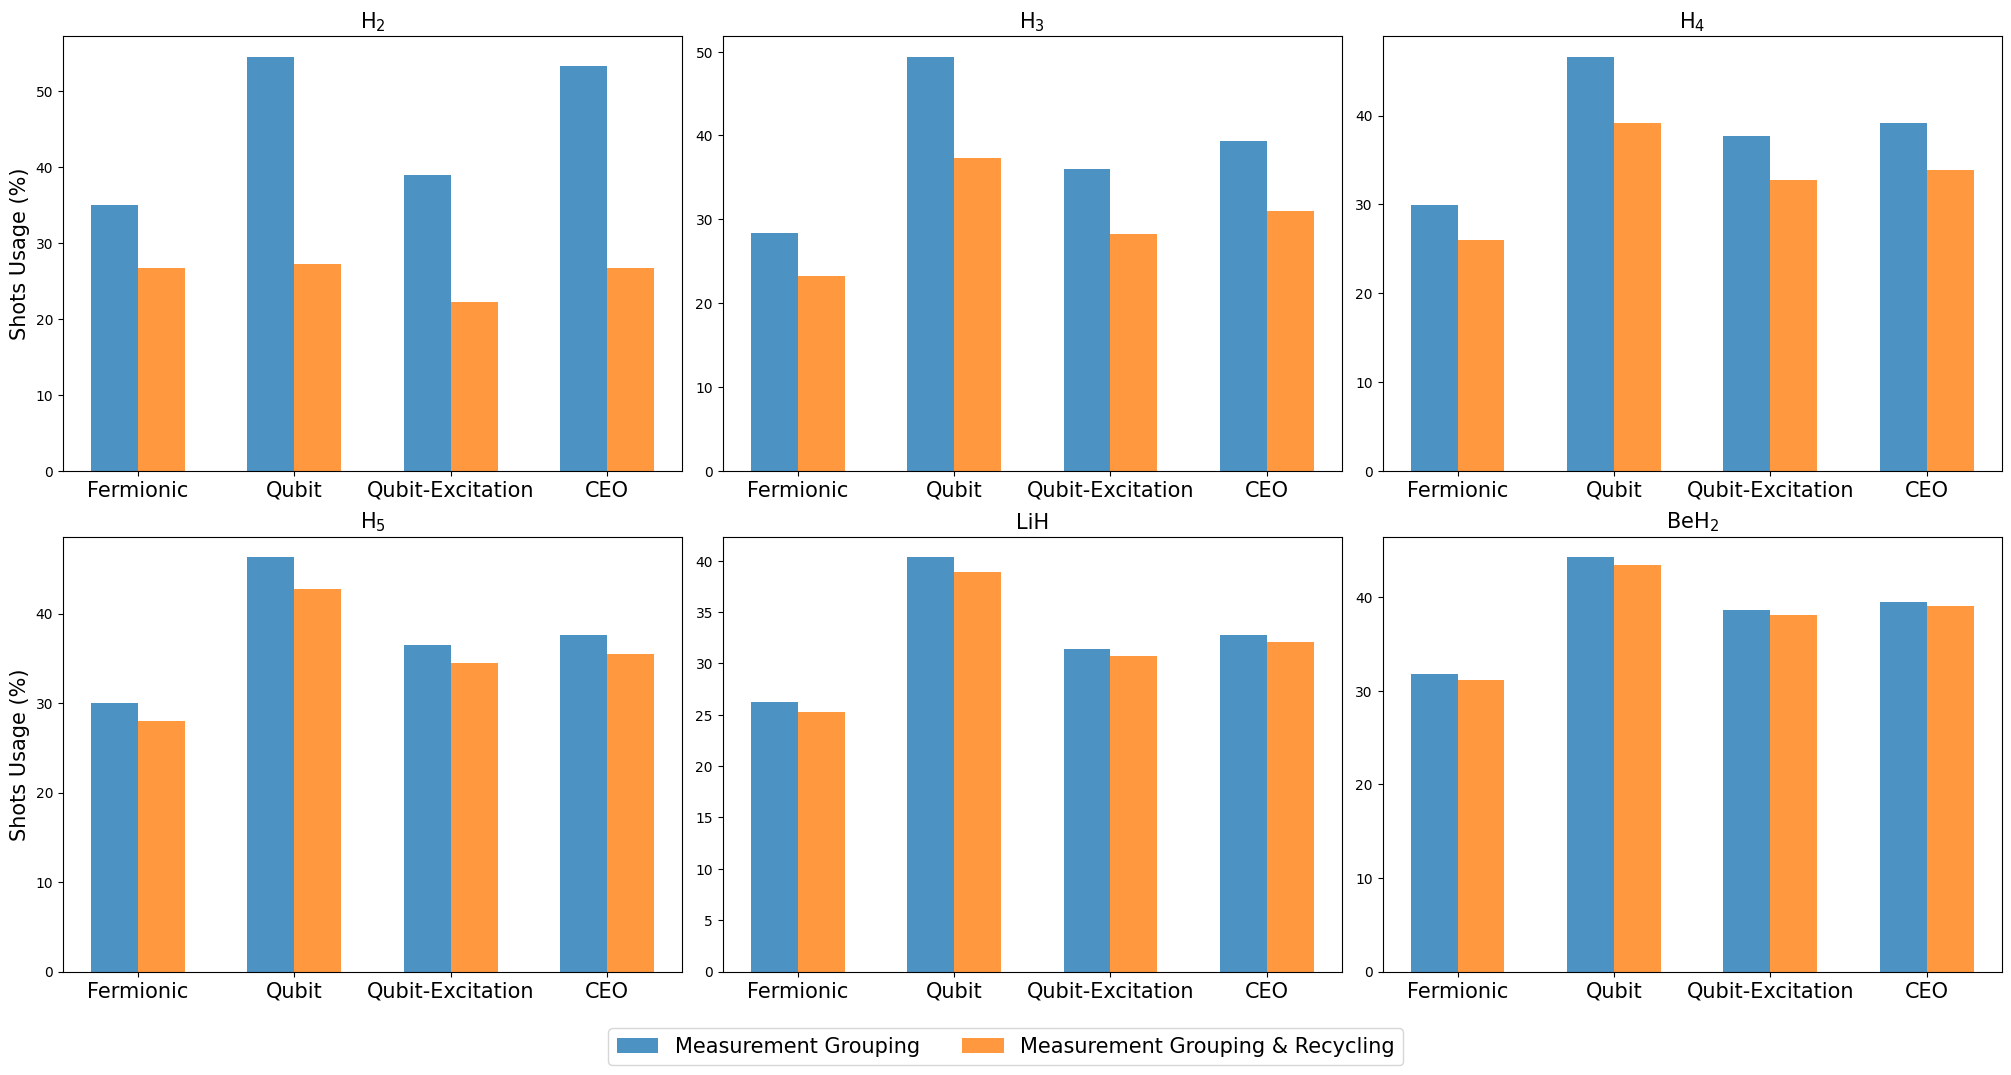

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Molecule variations
molecules = ["H$_2$", "H$_3$", "H$_4$", "H$_5$", "LiH", "BeH$_2$"]

# Data for each molecule
pools_data = {
    "H$_2$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "H$_3$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "H$_4$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "H$_5$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "LiH": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
    "BeH$_2$": ("Fermionic", "Qubit", "Qubit-Excitation", "CEO"),
}

methods_data = {
    "H$_2$": {
        # 'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (35, 54.54, 38.89, 53.33),
        'Measurement Grouping & Recycling': (26.67, 27.27, 22.22, 26.67),
    },
    "H$_3$": {
        # 'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (28.39, 49.41, 35.97, 39.31),
        'Measurement Grouping & Recycling': (23.21, 37.31, 28.22, 30.98),
    },
    "H$_4$": {
        # 'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (29.92, 46.64, 37.70, 39.16),
        'Measurement Grouping & Recycling': (25.98, 39.18, 32.75, 33.9),
    },
    "H$_5$": {
        # 'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (30.06, 46.27, 36.44, 37.63),
        'Measurement Grouping & Recycling': (28.01, 42.69, 34.51, 35.52),
    },
    "LiH": {
        # 'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (26.25, 40.31, 31.41, 32.76),
        'Measurement Grouping & Recycling': (25.27, 38.93, 30.74, 32.05),
    },
    "BeH$_2$": {
        # 'Full Measurement': (100, 100, 100, 100),
        'Measurement Grouping': (31.75, 44.26, 38.59, 39.51),
        'Measurement Grouping & Recycling': (31.13, 43.44, 38.16, 39.05),
    },
}

# Color palette for the bars
colors = {
    'Measurement Grouping': '#1f77b4',  # muted blue
    'Measurement Grouping & Recycling': '#ff7f0e'  # safety orange
}

# Creating 3x2 grid
fig, axes = plt.subplots(2, 3, figsize=(20, 10), layout='constrained')
width = 0.3  # Increased width of the bars

for i, (ax, molecule) in enumerate(zip(axes.flat, molecules)):
    pools = pools_data[molecule]
    methods = methods_data[molecule]
    x = np.arange(len(pools))  # Label locations
    multiplier = -0.5
    
    for attribute, measurement in methods.items():
        offset = width * multiplier
        # Use the color from the color palette
        rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[attribute], alpha=0.8) #Increased alpha
        multiplier += 1
    
    # Labels and ticks
    ax.set_title(molecule, fontsize=15)
    if i % 3 == 0:
        ax.set_ylabel('Shots Usage (%)', fontsize=15)
    ax.set_xticks(x , pools, fontsize=15) #Removed offset from xticks
    ax.tick_params(axis='y', labelsize=10)
    # ax.set_ylim(0, 110)

# Add a single legend outside the plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=15, bbox_to_anchor=(0.5, -0.07))

plt.savefig('Full_Measurement_recycling_2_colored.pdf', format='pdf', dpi=300, bbox_inches='tight')
# plt.savefig('Full_Measurement_recycling.eps', format='eps', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
"""    """